# Churn_Prediction_For_Bank_Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [177]:
# !pip install pyforest
# !pip install ipython
# !pip install pyclustertend
# !pip install xlrd
# !pip install Autoviz
# !pip install colorama
# !pip3 install termcolor
# !pip install termcolor
# !pip install pandas-profiling

In [2]:
#!pip install pyforest

# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
import plotly.express as px

from sklearn.compose import make_column_transformer

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from pandasgui import show
gui = show

import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact
import pandas_profiling

In [5]:
gui(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
INFO:pandasgui.gui:Opening PandasGUI


In [17]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [18]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

## Ingest Data

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [20]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

## Exploratory Data Analysis and Visualization

* Implement basic steps to see the data looks like
* Check missing values
* Drop the features that not necessarry
* Implement basic visualization steps (histogram, countplot, heatmap)
* Converting the categorical variables to dummies

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- The dataset has 14 columns and 10000 observations.
- 11 columns contain numerical data and 3 columns contain categorical values. 
- There seems to be no missing value. 

In [10]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset.")

There is 10000 observation and 14 columns in the dataset.


In [11]:
df.duplicated().sum()

0

In [12]:
print("There is", df.duplicated().sum(), "duplicated observations in the dataset.")

There is 0 duplicated observations in the dataset.


In [14]:
missing(df)

Missing_Number  Missing_Percent
RowNumber                     0            0.000
CustomerId                    0            0.000
Surname                       0            0.000
CreditScore                   0            0.000
Geography                     0            0.000
Gender                        0            0.000
Age                           0            0.000
Tenure                        0            0.000
Balance                       0            0.000
NumOfProducts                 0            0.000
HasCrCard                     0            0.000
IsActiveMember                0            0.000
EstimatedSalary               0            0.000
Exited                        0            0.000

- There is no missing value

In [15]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [16]:
# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

RowNumber has 10000 unique value
CustomerId has 10000 unique value
CreditScore has 460 unique value
Age has 70 unique value
Tenure has 11 unique value
Balance has 6382 unique value
NumOfProducts has 4 unique value
HasCrCard has 2 unique value
IsActiveMember has 2 unique value
EstimatedSalary has 9999 unique value
Exited has 2 unique value


* All the values in "RowNumber" and "CustomerId" are unique. So these columns need to be dropped as they will not help the prediction.
* The "Surname" column also dropped as have not useful info for prediction. 

In [17]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

In [18]:
df.describe(include=object).T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

* From columns "RowNumber", "CustomerId" and "Surname" are  not usefull for prediction.
* "Tenure", "NumOfProducts", "Geography" columns have multi-class type values.
* "HasCrCard", "IsActiveMember", "Exited", "Gender" columns have binary type values.

***According to the basic examinations on the dataset;***

- We have a classification problem.
- We are going to make classification on the target variable "Exited".
- And we will build a model to get the best classification on the "Exited" column.
- Because of that we are going to look at the balance of "Exited" column.
- "RowNumber", "CustomerId" and "Surname" columns will not help the prediction. So we will drop them.

In [22]:
drop_columns = ["RowNumber", "CustomerId", "Surname"]

df.drop(drop_columns, axis = 1, inplace = True)

In [23]:
df.shape

(10000, 11)

### The Examination of Target Variable
* We have an imbalanced data based on the target variable.
* 20.37 % of the customers didn't continue with the bank and left (Exited-1).
* 79.63 % of the customers continue with the bank and didn't leave (Exited-0).

In [26]:
first_looking("Exited")

column name    :  Exited
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
0    7963
1    2037
Name: Exited, dtype: int64


In [30]:
y = df['Exited']
print(f'Percentage of Exited-1: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} observations for Exited-1)\
      \nPercentage of Exited-0: % {round(y.value_counts(normalize=True)[0]*100,2)} --> \
      ({y.value_counts()[0]} observations for Exited-0)')

Percentage of Exited-1: % 20.37 --> (2037 observations for Exited-1)      
Percentage of Exited-0: % 79.63 --> (7963 observations for Exited-0)


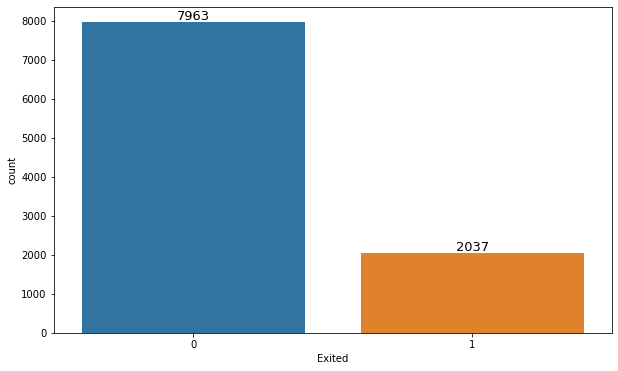

In [31]:
df["Exited"].value_counts()
sns.countplot(x = df["Exited"], data = df)
for index,value in enumerate(df["Exited"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

0    7963
1    2037
Name: Exited, dtype: int64


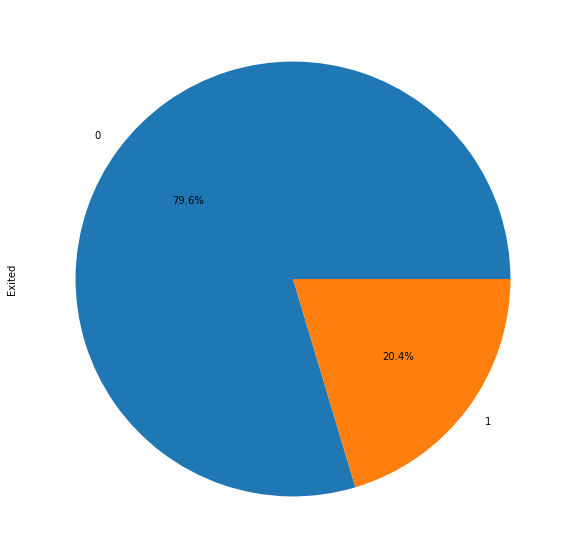

In [32]:
print(df["Exited"].value_counts())
df["Exited"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [33]:
df['Exited'].describe()

count   10000.000
mean        0.204
std         0.403
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Exited, dtype: float64

In [34]:
df[df['Exited']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [35]:
df[df['Exited']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

Examination of numerical and categorical columns

In [39]:
numerical= df.drop(['Exited'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

Categorical Columns: Index(['Geography', 'Gender'], dtype='object')


### Numerical Columns

In [40]:
df[numerical].head().T

0          1          2         3          4
CreditScore        619.000    608.000    502.000   699.000    850.000
Age                 42.000     41.000     42.000    39.000     43.000
Tenure               2.000      1.000      8.000     1.000      2.000
Balance              0.000  83807.860 159660.800     0.000 125510.820
NumOfProducts        1.000      1.000      3.000     2.000      1.000
HasCrCard            1.000      0.000      1.000     0.000      1.000
IsActiveMember       1.000      1.000      0.000     0.000      1.000
EstimatedSalary 101348.880 112542.580 113931.570 93826.630  79084.100

In [41]:
df[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [42]:
df[numerical].iplot(kind='histogram', subplots=True,bins=50)

In [32]:
for i in numerical:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

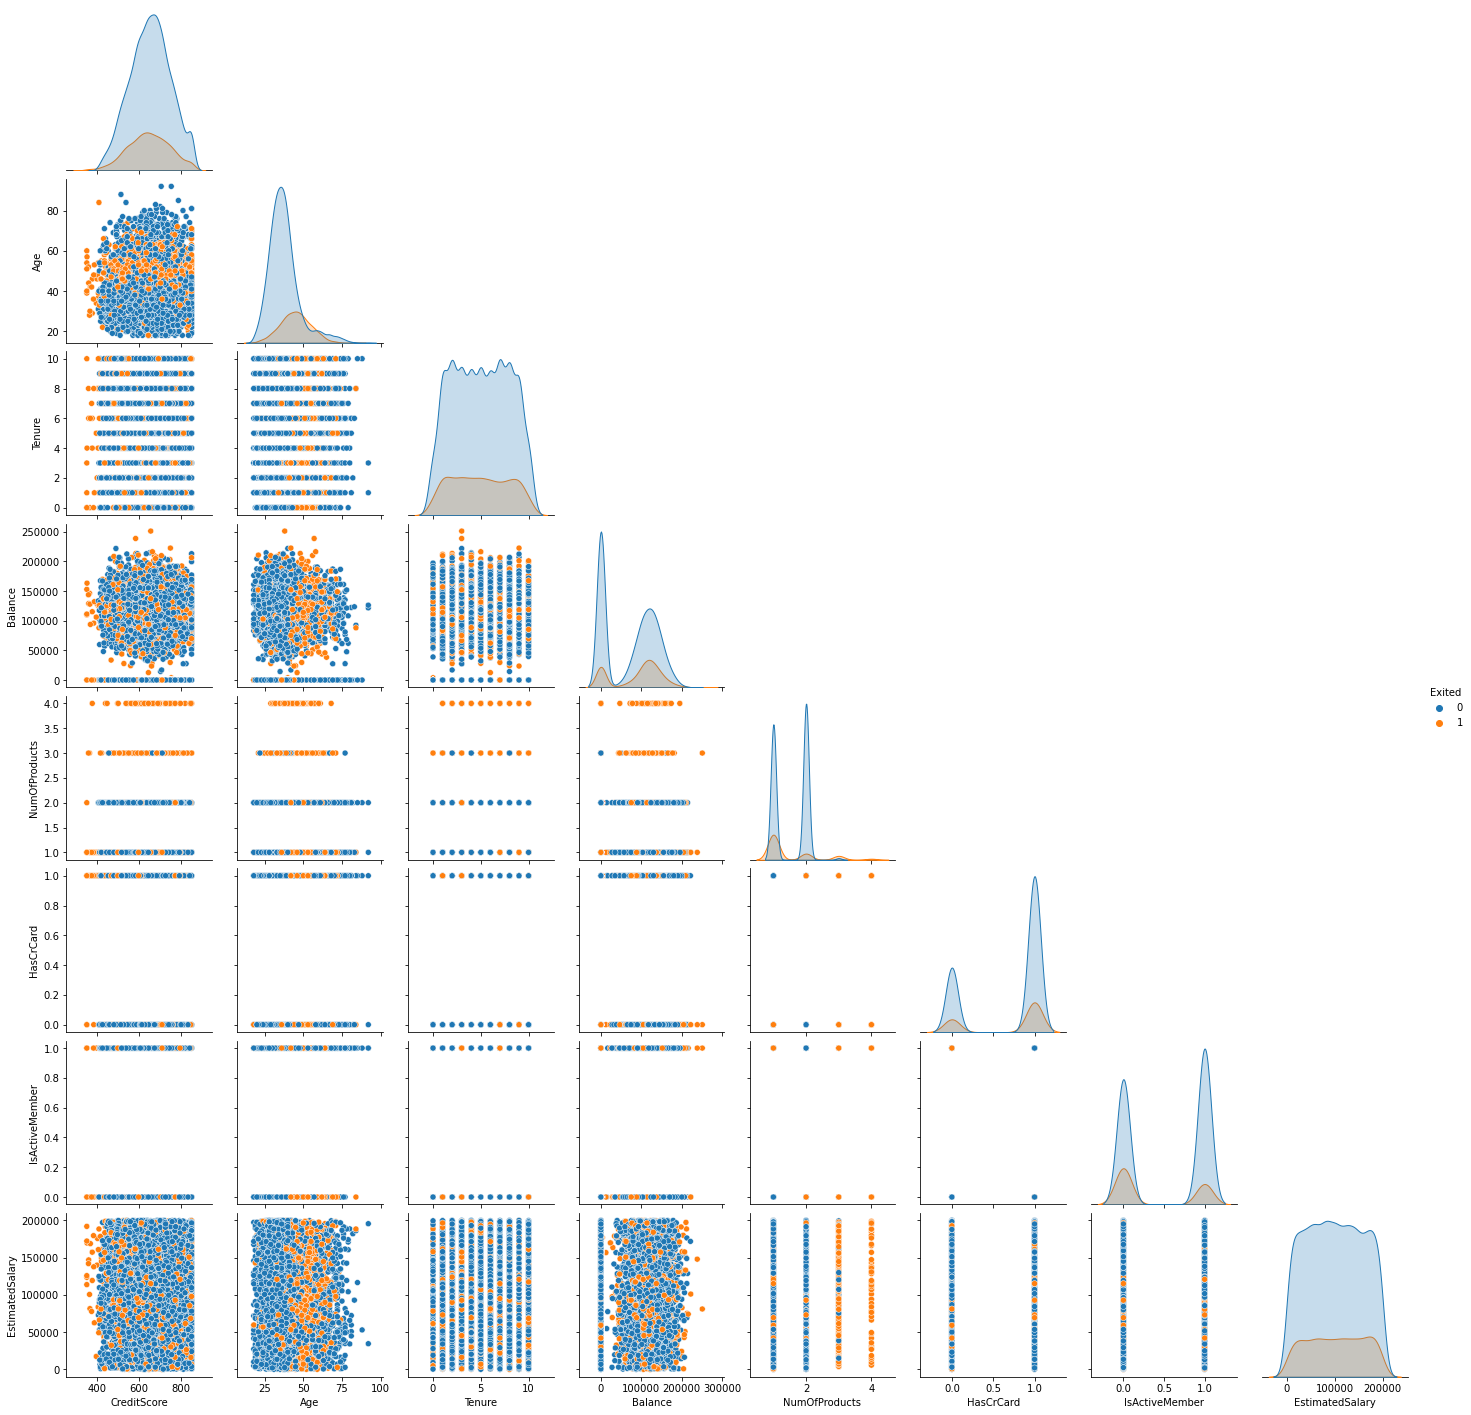

In [33]:
sns.pairplot(df, hue="Exited", corner=True);

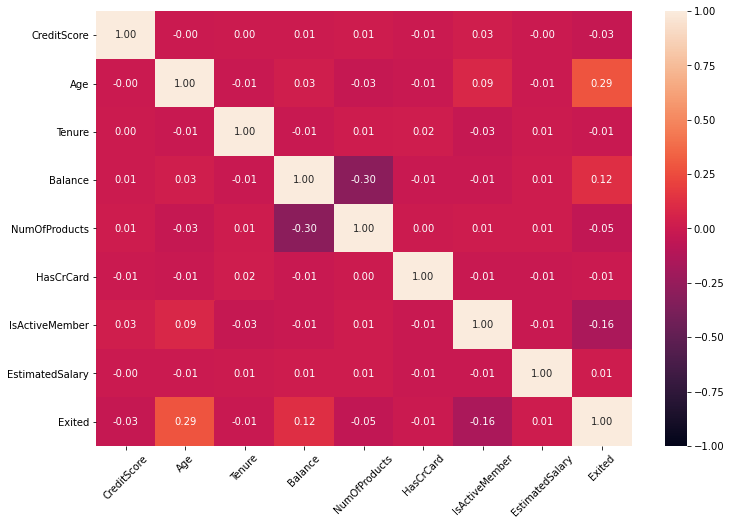

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap (df.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1)
plt.xticks(rotation=45);

In [35]:
df.corr()["Exited"].sort_values().drop("Exited").iplot(kind = "barh");

In [36]:
df_temp = df.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

For CreditScore and CreditScore, there is NO multicollinearity problem
For CreditScore and Age, there is NO multicollinearity problem
For CreditScore and Tenure, there is NO multicollinearity problem
For CreditScore and Balance, there is NO multicollinearity problem
For CreditScore and NumOfProducts, there is NO multicollinearity problem
For CreditScore and HasCrCard, there is NO multicollinearity problem
For CreditScore and IsActiveMember, there is NO multicollinearity problem
For CreditScore and EstimatedSalary, there is NO multicollinearity problem
For CreditScore and Exited, there is NO multicollinearity problem
For Age and CreditScore, there is NO multicollinearity problem
For Age and Age, there is NO multicollinearity problem
For Age and Tenure, there is NO multicollinearity problem
For Age and Balance, there is NO multicollinearity problem
For Age and NumOfProducts, there is NO multicollinearity problem
For Age and HasCrCard, there is NO multicollinearity problem
For Age and IsA

***Based on the examinations made above,***

- We have weak level correlation between the numerical features and the target column.
- Also there is weak level correlation between the columns.
- Age has more influence on the decision to leave the bank than the other columns.
- It is noteworthy that those who left the bank are in the 45-65 age group. 
- The increase in the number of products negatively affects the decision to continue with the bank.
- Another remarkable situation is the concentration of leaving the bank in the group where the number of products is 3 and 4. 

In [37]:
df.Tenure

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64

In [38]:
df["Tenure"].iplot(kind='histogram', subplots=True,bins=50, title = "Tenure Distribution", xTitle = "Tenure", yTitle = "Count")

### Categorical Columns

In [39]:
df[categorical].head().T

0       1       2       3       4
Geography  France   Spain  France  France   Spain
Gender     Female  Female  Female  Female  Female

In [40]:
df[categorical].describe()

Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457

In [41]:
df[categorical].iplot(kind='histogram', subplots=True,bins=50)

***Geography and Exited***

In [42]:
first_looking("Geography")

column name    :  Geography
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [44]:
px.histogram(df, x=df.Geography, color="Exited")

In [45]:
pd.crosstab(df["Geography"], df["Exited"])

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413

In [ ]:
sns.swarmplot(y="Age", x="Geography", hue="Exited", data=df);

***Gender and Exited***

In [46]:
first_looking("Gender")

column name    :  Gender
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Male      5457
Female    4543
Name: Gender, dtype: int64


In [48]:
pd.crosstab(df["Gender"], df["Exited"])

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

In [ ]:
sns.swarmplot(y="Age", x="Gender", hue="Exited", data=df);

- As mentioned above, we can clearly see that leaving the bank is concentrated in the 45-65 age group.

In [65]:
df = pd.get_dummies(df)

In [66]:
df.head(1)

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          619   42       2    0.000              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1       101348.880       1                 1   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0

## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = 99)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1       101348.880                 1                  0   
1               1       112542.580                 0                  0   
2               0       113931.570                 1                  0   
3               0        93826.630                 1                  0   
4               1        79084.100                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              1            0  
1                1              1            0  
2                0              1            0  
3                0              1            0  
4                1              1            0

In [74]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
pd.DataFrame(X_train)

0     1     2     3     4     5     6     7     8     9     10    11  \
0    0.424 0.122 0.300 0.000 0.333 1.000 0.000 0.141 1.000 0.000 0.000 1.000   
1    0.734 0.405 0.700 0.493 0.000 1.000 1.000 0.850 1.000 0.000 0.000 0.000   
2    0.832 0.365 0.600 0.000 0.333 0.000 0.000 0.736 1.000 0.000 0.000 1.000   
3    0.338 0.270 0.100 0.455 0.000 1.000 1.000 0.305 0.000 1.000 0.000 0.000   
4    1.000 0.338 0.700 0.000 0.333 1.000 1.000 0.869 1.000 0.000 0.000 0.000   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
8995 0.272 0.257 0.900 0.459 0.333 1.000 0.000 0.725 0.000 1.000 0.000 0.000   
8996 0.756 0.257 0.300 0.489 0.333 0.000 0.000 0.535 1.000 0.000 0.000 0.000   
8997 0.642 0.432 0.800 0.000 0.000 0.000 1.000 0.013 0.000 0.000 1.000 0.000   
8998 0.570 0.432 0.700 0.636 0.333 0.000 0.000 0.273 0.000 0.000 1.000 0.000   
8999 0.362 0.608 0.100 0.457 0.000 0.000 1.000 0.122 1.000 0.000 0.000 1.000   

        12  
0    0.000  
1    1.000  
2    0.000  
3    1.000  
4    1.000  
...    ...  
8995 1.000  
8996 1.000  
8997 1.000  
8998 1.000  
8999 0.000  

[9000 rows x 13 columns]

## Modelling & Model Performance

### Import related libraries

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

### Creating Model

### without class_weigth

In [76]:
X_train.shape

(9000, 13)

In [77]:
X_test.shape

(1000, 13)

In [81]:
model = Sequential()

model.add(Dense(32, activation = "relu"))  # genelde hidden layer larda RELU kullanılır. Çünkü öğrenme daha hızlı olur.
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # binary vlassification olduğu için output layer da tek nöron olmak zorunda
                                             # SIGMOID datayı 0-1 arasına sıkıştırdığından tercih ettik. Binary Classification prob

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [82]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [83]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 0s 855us/step - loss: 0.4682 - accuracy: 0.7964 - val_loss: 0.4396 - val_accuracy: 0.8211
Epoch 2/1000
254/254 [==============================] - 0s 489us/step - loss: 0.4296 - accuracy: 0.8112 - val_loss: 0.4111 - val_accuracy: 0.8244
Epoch 3/1000
254/254 [==============================] - 0s 493us/step - loss: 0.3993 - accuracy: 0.8283 - val_loss: 0.3783 - val_accuracy: 0.8356
Epoch 4/1000
254/254 [==============================] - 0s 489us/step - loss: 0.3700 - accuracy: 0.8428 - val_loss: 0.3475 - val_accuracy: 0.8533
Epoch 5/1000
254/254 [==============================] - 0s 489us/step - loss: 0.3596 - accuracy: 0.8493 - val_loss: 0.3521 - val_accuracy: 0.8633
Epoch 6/1000
254/254 [==============================] - 0s 485us/step - loss: 0.3522 - accuracy: 0.8554 - val_loss: 0.3416 - val_accuracy: 0.8656
Epoch 7/1000
254/254 [==============================] - 0s 487us/step - loss: 0.3534 - accuracy: 0.8547 - val_loss: 0.3428 -

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.468     0.796     0.440         0.821
1 0.430     0.811     0.411         0.824
2 0.399     0.828     0.378         0.836
3 0.370     0.843     0.347         0.853
4 0.360     0.849     0.352         0.863

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  accuracy  val_loss  val_accuracy
38 0.323     0.867     0.343         0.861
39 0.326     0.864     0.352         0.859
40 0.320     0.866     0.340         0.854
41 0.321     0.865     0.340         0.862
42 0.319     0.867     0.337         0.854

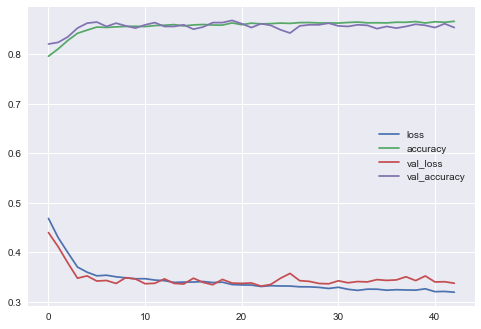

In [87]:
loss_df.plot();

#### Evaluate

In [88]:
model.evaluate(X_test, y_test, verbose=0)

[0.3347609341144562, 0.8629999756813049]

In [89]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3347609341144562
accuracy :  0.8629999756813049


In [90]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[754  42]
 [ 95 109]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       796
           1       0.72      0.53      0.61       204

    accuracy                           0.86      1000
   macro avg       0.80      0.74      0.77      1000
weighted avg       0.85      0.86      0.85      1000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

- https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758
- https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

In [91]:
from sklearn.utils import class_weight

In [92]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [93]:
class_weights

array([0.62787777, 2.45499182])

In [94]:
model_weighted = Sequential()

model_weighted.add(Dense(32, activation = "relu"))  # genelde hidden layer larda RELU kullanılır. Çünkü öğrenme daha hızlı olur.
model_weighted.add(Dense(16, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))  # binary vlassification olduğu için output layer da tek nöron olmak zorunda
                                             # SIGMOID datayı 0-1 arasına sıkıştırdığından tercih ettik. Binary Classification prob

opt = Adam(lr = 0.005)
model_weighted.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [95]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [96]:
class_weight = {0: 0.62787777, 1: 2.45499182}           # class_weight = {0: 0.20, 1: 0.80}

In [97]:
model_weighted.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1,
          callbacks = [early_stop], class_weight=class_weight)

Epoch 1/1000
254/254 [==============================] - 0s 842us/step - loss: 0.6226 - accuracy: 0.6599 - val_loss: 0.5806 - val_accuracy: 0.7011
Epoch 2/1000
254/254 [==============================] - 0s 520us/step - loss: 0.5557 - accuracy: 0.7209 - val_loss: 0.4501 - val_accuracy: 0.7956
Epoch 3/1000
254/254 [==============================] - 0s 520us/step - loss: 0.5139 - accuracy: 0.7514 - val_loss: 0.6066 - val_accuracy: 0.6811
Epoch 4/1000
254/254 [==============================] - 0s 520us/step - loss: 0.5015 - accuracy: 0.7475 - val_loss: 0.5303 - val_accuracy: 0.7333
Epoch 5/1000
254/254 [==============================] - 0s 524us/step - loss: 0.4894 - accuracy: 0.7616 - val_loss: 0.4784 - val_accuracy: 0.7744
Epoch 6/1000
254/254 [==============================] - 0s 524us/step - loss: 0.4881 - accuracy: 0.7626 - val_loss: 0.4817 - val_accuracy: 0.7700
Epoch 7/1000
254/254 [==============================] - 0s 516us/step - loss: 0.4808 - accuracy: 0.7699 - val_loss: 0.5690 -

In [98]:
model_weighted.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [99]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.623     0.660     0.581         0.701
1 0.556     0.721     0.450         0.796
2 0.514     0.751     0.607         0.681
3 0.501     0.748     0.530         0.733
4 0.489     0.762     0.478         0.774

In [100]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.tail()

loss  accuracy  val_loss  val_accuracy
29 0.446     0.805     0.474         0.780
30 0.447     0.795     0.452         0.790
31 0.444     0.801     0.414         0.814
32 0.443     0.803     0.471         0.787
33 0.441     0.800     0.467         0.782

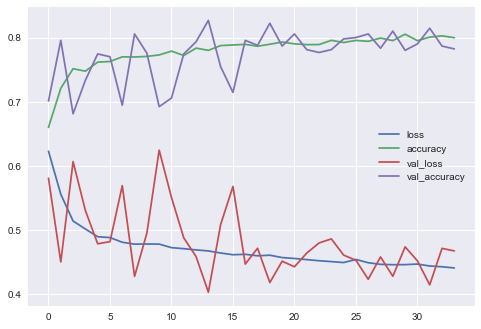

In [101]:
loss_df.plot();

#### Evaluate

In [102]:
model_weighted.evaluate(X_test, y_test, verbose=0)

[0.4301387071609497, 0.800000011920929]

In [103]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4301387071609497
accuracy :  0.800000011920929


In [104]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[647 149]
 [ 51 153]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       796
           1       0.51      0.75      0.60       204

    accuracy                           0.80      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.80      0.81      1000



## GridSearchCV

In [105]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [106]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [107]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/200
282/282 [==============================] - 0s 380us/step - loss: 0.5160 - accuracy: 0.7960
Epoch 2/200
282/282 [==============================] - 0s 383us/step - loss: 0.4889 - accuracy: 0.7963
Epoch 3/200
282/282 [==============================] - 0s 383us/step - loss: 0.4801 - accuracy: 0.7963
Epoch 4/200
282/282 [==============================] - 0s 380us/step - loss: 0.4747 - accuracy: 0.7963
Epoch 5/200
282/282 [==============================] - 0s 380us/step - loss: 0.4708 - accuracy: 0.7963
Epoch 6/200
282/282 [==============================] - 0s 387us/step - loss: 0.4676 - accuracy: 0.7964
Epoch 7/200
282/282 [==============================] - 0s 387us/step - loss: 0.4646 - accuracy: 0.7967
Epoch 8/200
282/282 [==============================] - 0s 383us/step - loss: 0.4620 - accuracy: 0.7971
Epoch 9/200
282/282 [==============================] - 0s 383us/step - loss: 0.4590 - accuracy: 0.7981
Epoch 10/2

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E01978E9D0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [108]:
grid_model.best_score_

0.8577777777777778

In [109]:
grid_model.best_params_

{'batch_size': 32, 'optimizer': 'SGD'}

#### Evaluate

***ROC (Receiver Operating Curve) and AUC (Area Under Curve)*** 
***for keras_model***

In [110]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model')
plt.show()

In [111]:
roc_auc_score(y_test, y_pred_proba)

0.8672590895654745

***for keras_model_weighted***

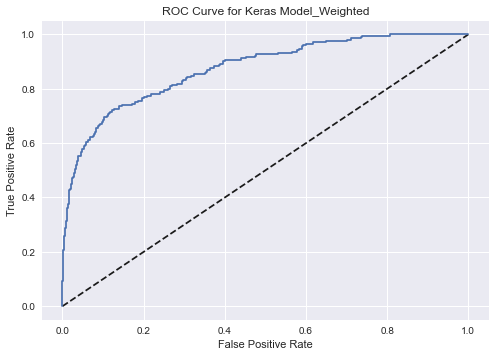

In [112]:
y_pred_proba = model_weighted.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model_Weighted')
plt.show()

In [113]:
roc_auc_score(y_test, y_pred_proba)

0.8737806680461129

***for grid_model***

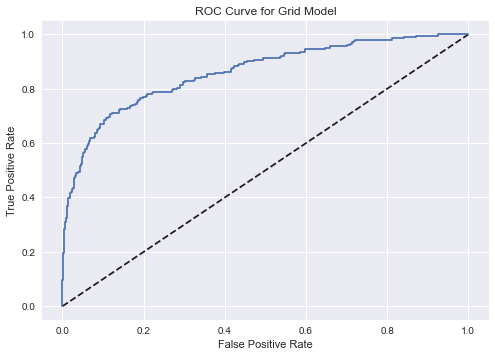

In [114]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Grid Model')
plt.show()

In [115]:
roc_auc_score(y_test, y_pred_proba)

0.8610946891319342

## Final Model and Model Deployment

In [116]:
import pickle
pickle.dump(scaler, open("scaler_exited", 'wb'))

In [134]:
final_model = Sequential()

final_model.add(Dense(64, activation = "relu"))  # genelde hidden layer larda RELU kullanılır. Çünkü öğrenme daha hızlı olur.
final_model.add(Dense(32, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  # binary vlassification olduğu için output layer da tek nöron olmak zorunda
                                             # SIGMOID datayı 0-1 arasına sıkıştırdığından tercih ettik. Binary Classification prob

opt = Adam(lr = 0.001)
final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [135]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [136]:
class_weight = {0: 0.62787777, 1: 2.45499182}

In [137]:
final_model.fit(x = X_train, y = y_train, 
                validation_data = (X_test, y_test), 
                batch_size = 32, 
                epochs = 1000, verbose = 1,
                callbacks = [early_stop], 
                class_weight = class_weight)

Epoch 1/1000
282/282 [==============================] - 1s 777us/step - loss: 0.6317 - accuracy: 0.6578 - val_loss: 0.5504 - val_accuracy: 0.7250
Epoch 2/1000
282/282 [==============================] - 0s 528us/step - loss: 0.5899 - accuracy: 0.6902 - val_loss: 0.5798 - val_accuracy: 0.6920
Epoch 3/1000
282/282 [==============================] - 0s 532us/step - loss: 0.5678 - accuracy: 0.7149 - val_loss: 0.5547 - val_accuracy: 0.7160
Epoch 4/1000
282/282 [==============================] - 0s 531us/step - loss: 0.5346 - accuracy: 0.7441 - val_loss: 0.4978 - val_accuracy: 0.7590
Epoch 5/1000
282/282 [==============================] - 0s 538us/step - loss: 0.5132 - accuracy: 0.7542 - val_loss: 0.5155 - val_accuracy: 0.7500
Epoch 6/1000
282/282 [==============================] - 0s 536us/step - loss: 0.4977 - accuracy: 0.7624 - val_loss: 0.4080 - val_accuracy: 0.8290
Epoch 7/1000
282/282 [==============================] - 0s 532us/step - loss: 0.4917 - accuracy: 0.7660 - val_loss: 0.4141 -

In [138]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot()

<AxesSubplot:>

In [139]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[620 176]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.47      0.78      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



In [140]:
model.save('model_exited.h5')

### Loading Model and Scaler

In [141]:
from tensorflow.keras.models import load_model

In [142]:
model_exited = load_model('model_exited.h5')
scaler_exited = pickle.load(open("scaler_exited", "rb"))

### Prediction

In [161]:
ten_customer = df.drop('Exited', axis = 1).iloc[10:20, :]
ten_customer

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
10          528   31       6 102016.720              2          0   
11          497   24       3      0.000              2          1   
12          476   34      10      0.000              2          1   
13          549   25       5      0.000              2          0   
14          635   35       7      0.000              2          1   
15          616   45       3 143129.410              2          0   
16          653   58       1 132602.880              1          1   
17          549   24       9      0.000              2          1   
18          587   45       6      0.000              1          0   
19          726   24       6      0.000              2          1   

    IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
10               0        80181.120                 1                  0   
11               0        76390.010                 0                  0   
12               0        26260.980                 1                  0   
13               0       190857.790                 1                  0   
14               1        65951.650                 0                  0   
15               1        64327.260                 0                  1   
16               0         5097.670                 0                  1   
17               1        14406.410                 0                  0   
18               0       158684.810                 0                  0   
19               1        54724.030                 1                  0   

    Geography_Spain  Gender_Female  Gender_Male  
10                0              0            1  
11                1              0            1  
12                0              1            0  
13                0              1            0  
14                1              1            0  
15                0              0            1  
16                0              0            1  
17                1              1            0  
18                1              0            1  
19                0              1            0

In [162]:
ten_customer = scaler_exited.transform(first_ten_customer)
ten_customer

array([[-6.99288000e-01, -2.40869248e-01,  6.00000000e-02,
         1.62060303e-06, -2.22222222e-01,  0.00000000e+00,
         0.00000000e+00, -5.59009086e-05,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-6.99412000e-01, -2.42147553e-01,  3.00000000e-02,
         0.00000000e+00, -2.22222222e-01,  1.00000000e+00,
         0.00000000e+00, -5.59957045e-05,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-6.99496000e-01, -2.40321402e-01,  1.00000000e-01,
         0.00000000e+00, -2.22222222e-01,  1.00000000e+00,
         0.00000000e+00, -5.72491696e-05,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-6.99204000e-01, -2.41964938e-01,  5.00000000e-02,
         0.00000000e+00, -2.22222222e-01,  0.00000000e+00,
         0.00000000e+00, -5.31334633e-05,  1.00000000e+00,
         0.00000000e+00,  0.00000000e

In [174]:
(model_exited.predict(ten_customer) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [172]:
df["Exited"].iloc[10:20]

10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: Exited, dtype: int64